In [1]:
import pandas as pd
import numpy as np
import os

# Set the output directory
output_dir = r'C:\Users\HP\OneDrive\GLOCESTER NHS'
os.makedirs(output_dir, exist_ok=True)

def generate_data(num_rows, columns, id_start=1):
    """Generate synthetic data for specified columns and number of rows."""
    data = {'Patient_ID': range(id_start, id_start + num_rows)}
    choices = {
        'Age': lambda: np.random.randint(18, 90, num_rows),
        'Gender': lambda: np.random.choice(['Male', 'Female'], num_rows),
        'Condition': lambda: np.random.choice(['Diabetes', 'Hypertension', 'Asthma', 'None'], num_rows),
        'Medication': lambda: np.random.choice(['Metformin', 'Lisinopril', 'Salbutamol', 'None'], num_rows),
        'A&E_Attendance': lambda: np.random.poisson(0.5, num_rows),
        'Emergency_Admissions': lambda: np.random.poisson(0.2, num_rows),
        'Elective_Admissions': lambda: np.random.poisson(0.3, num_rows),
        'Procedures': lambda: np.random.choice(['Knee Replacement', 'Appendectomy', 'None'], num_rows),
        'Outpatient_Visits': lambda: np.random.poisson(1, num_rows),
        'Social_Care_Package': lambda: np.random.choice(['Home Care', 'Respite Care', 'None'], num_rows)
    }
    
    for col in columns:
        if col in choices:
            data[col] = choices[col]()
    
    return pd.DataFrame(data)

# Generate data and save as CSV
df = generate_data(1000, ['Age', 'Gender', 'Condition', 'Medication', 'A&E_Attendance', 'Emergency_Admissions', 'Elective_Admissions', 'Procedures', 'Outpatient_Visits', 'Social_Care_Package'])
output_path = os.path.join(output_dir, 'synthetic_data.csv')
df.to_csv(output_path, index=False)

# Display a sample of the data
print("Sample of the generated data:")
print(df.head())  # Display first 5 rows

print(f"Data saved to: {output_path}")


PermissionError: [WinError 5] Access is denied: 'C:\\Users\\HP'

In [2]:
# Generate datasets
num_rows = 1000
primary_care = generate_data(num_rows, ['Age', 'Gender', 'Condition'], id_start=1)
coded_conditions = generate_data(num_rows, ['Condition'], id_start=1)
medications = generate_data(num_rows, ['Medication'], id_start=1)
a_and_e = generate_data(num_rows, ['A&E_Attendance'], id_start=1)
emergency_admissions = generate_data(num_rows, ['Emergency_Admissions', 'Elective_Admissions', 'Procedures'], id_start=1)
outpatients = generate_data(num_rows, ['Outpatient_Visits'], id_start=1)
social_care = generate_data(num_rows, ['Social_Care_Package'], id_start=1)

# Merge datasets into Adverse Prediction CSV
merged_data = primary_care
for dataset in [coded_conditions, medications, a_and_e, emergency_admissions, outpatients, social_care]:
    merged_data = pd.merge(merged_data, dataset, on='Patient_ID', how='outer')

# Introduce 19% missing values
missing_mask = np.random.rand(*merged_data.shape) < 0.19
merged_data = merged_data.mask(missing_mask)

In [3]:
import pandas as pd
import os

# Define the output directory
file_directory = r'C:\Users\HP\OneDrive\GLOCESTER NHS'
os.makedirs(file_directory, exist_ok=True)

# List of dataset names and corresponding DataFrames
datasets = {
    'Primary_Care.csv': primary_care,
    'Coded_Conditions.csv': coded_conditions,
    'Medications.csv': medications,
    'A_and_E.csv': a_and_e,
    'Emergency_Admissions.csv': emergency_admissions,
    'Outpatients.csv': outpatients,
    'Social_Care.csv': social_care,
    'Adverse_Prediction.csv': merged_data
}

# Save datasets to the specified directory
for name, dataset in datasets.items():
    try:
        dataset.to_csv(os.path.join(file_directory, name), index=False)
        print(f"Dataset '{name}' has been successfully saved.")
    except Exception as e:
        print(f"Failed to save '{name}': {e}")

print("All datasets have been processed.")


Dataset 'Primary_Care.csv' has been successfully saved.
Dataset 'Coded_Conditions.csv' has been successfully saved.
Dataset 'Medications.csv' has been successfully saved.
Dataset 'A_and_E.csv' has been successfully saved.
Dataset 'Emergency_Admissions.csv' has been successfully saved.
Dataset 'Outpatients.csv' has been successfully saved.
Dataset 'Social_Care.csv' has been successfully saved.
Dataset 'Adverse_Prediction.csv' has been successfully saved.
All datasets have been processed.


- Step 1: Data Exploration and Target Variable Creation

In [4]:
# Display the first 10 columns of the merged dataset

display(merged_data.iloc[:, :10].head())

,Patient_ID,Age,Gender,Condition_x,Condition_y,Medication,A&E_Attendance,Emergency_Admissions,Elective_Admissions,Procedures
0,1.0,NaN,Male,Hypertension,None,None,0.0,NaN,1.0,Appendectomy
1,2.0,81.0,NaN,Asthma,Hypertension,NaN,0.0,0.0,0.0,Appendectomy
2,3.0,36.0,Male,Diabetes,Diabetes,Salbutamol,0.0,0.0,1.0,None
3,NaN,NaN,NaN,NaN,Hypertension,None,1.0,NaN,0.0,Appendectomy
4,5.0,21.0,Female,None,Hypertension,NaN,NaN,NaN,0.0,Appendectomy


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Load the dataset
file_path = r'C:\Users\HP\OneDrive\GLOCESTER NHS\Adverse_Prediction.csv'
data = pd.read_csv(file_path)

# 1. Examine Dataset Structure
print("Dataset Shape:", data.shape)
print("\nColumn Names:", data.columns.tolist())
print("\nData Types:")
print(data.dtypes)

# Display first few rows
print("\nFirst Few Rows:")
display(data.head())

# Missing Data Summary
missing_data = data.isnull().sum().reset_index()
missing_data.columns = ['Column', 'Missing Values']
missing_data['Percentage Missing'] = (missing_data['Missing Values'] / len(data)) * 100
print("\nMissing Data Summary:")
display(missing_data)


Dataset Shape: (1000, 12)

Column Names: ['Patient_ID', 'Age', 'Gender', 'Condition_x', 'Condition_y', 'Medication', 'A&E_Attendance', 'Emergency_Admissions', 'Elective_Admissions', 'Procedures', 'Outpatient_Visits', 'Social_Care_Package']

Data Types:
Patient_ID              float64
Age                     float64
Gender                   object
Condition_x              object
Condition_y              object
Medication               object
A&E_Attendance          float64
Emergency_Admissions    float64
Elective_Admissions     float64
Procedures               object
Outpatient_Visits       float64
Social_Care_Package      object
dtype: object

First Few Rows:


,Patient_ID,Age,Gender,Condition_x,Condition_y,Medication,A&E_Attendance,Emergency_Admissions,Elective_Admissions,Procedures,Outpatient_Visits,Social_Care_Package
0,1.0,NaN,Male,Hypertension,NaN,NaN,0.0,NaN,1.0,Appendectomy,NaN,Respite Care
1,2.0,81.0,NaN,Asthma,Hypertension,NaN,0.0,0.0,0.0,Appendectomy,2.0,NaN
2,3.0,36.0,Male,Diabetes,Diabetes,Salbutamol,0.0,0.0,1.0,NaN,0.0,NaN
3,NaN,NaN,NaN,NaN,Hypertension,NaN,1.0,NaN,0.0,Appendectomy,1.0,Home Care
4,5.0,21.0,Female,NaN,Hypertension,NaN,NaN,NaN,0.0,Appendectomy,NaN,NaN



Missing Data Summary:


,Column,Missing Values,Percentage Missing
0,Patient_ID,196,19.6
1,Age,182,18.2
2,Gender,189,18.9
3,Condition_x,399,39.9
4,Condition_y,399,39.9
5,Medication,380,38.0
6,A&E_Attendance,176,17.6
7,Emergency_Admissions,195,19.5
8,Elective_Admissions,191,19.1
9,Procedures,508,50.8


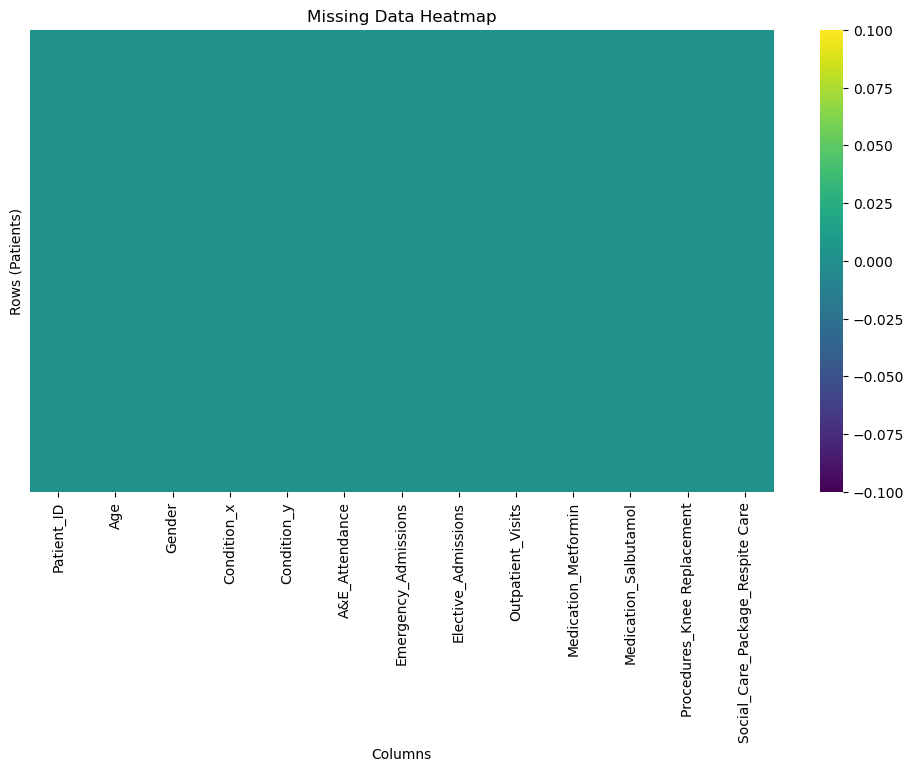

C:\Users\HP\AppData\Local\Temp\ipykernel_8644\385770308.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


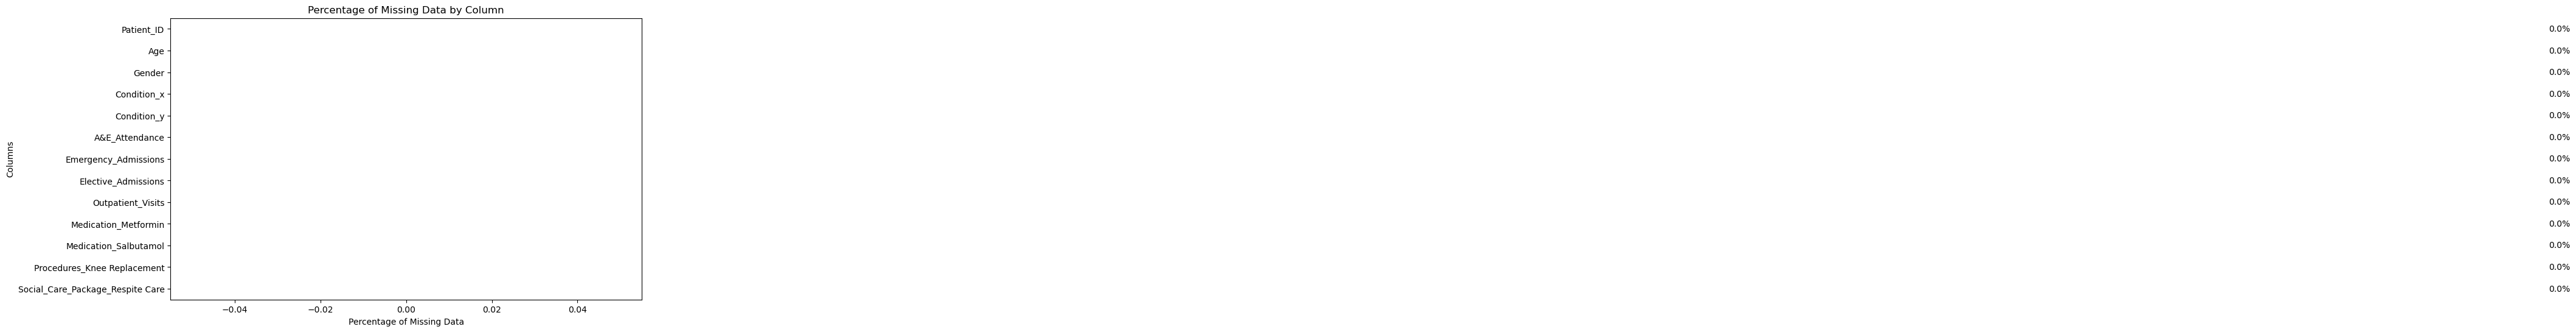

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


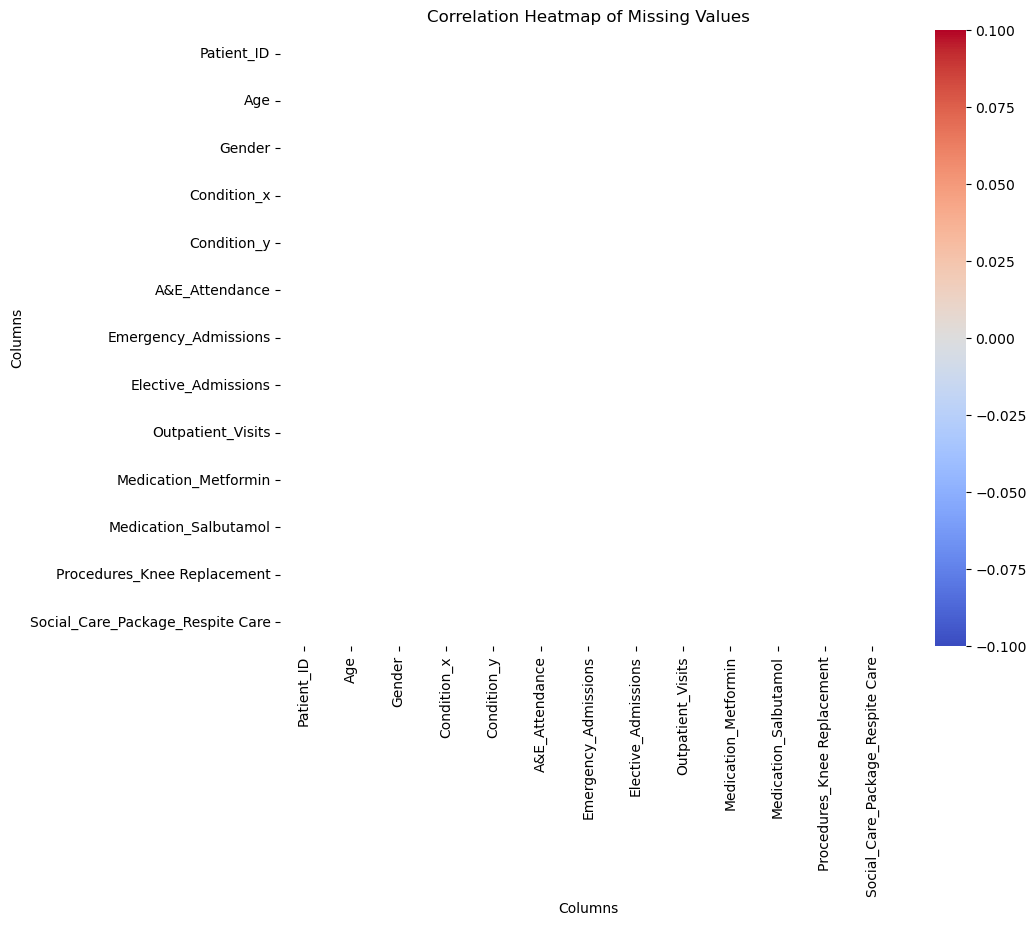

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the new repository
file_path = r'C:\Users\HP\OneDrive\GLOCESTER NHS\Adverse_Prediction_Encoded_and_Scaled.csv'
data = pd.read_csv(file_path)

# Step 5: Handle Missing Data

# Heatmap to show missing data pattern
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows (Patients)")
plt.show()

# Bar plot for percentage of missing values by column
missing_data = data.isnull().sum().reset_index()
missing_data.columns = ['Column', 'Missing Values']
missing_data['Percentage Missing'] = (missing_data['Missing Values'] / len(data)) * 100
missing_data_sorted = missing_data.sort_values(by="Percentage Missing", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Percentage Missing", y="Column", data=missing_data_sorted, palette="Blues_r"
)
plt.title("Percentage of Missing Data by Column")
plt.xlabel("Percentage of Missing Data")
plt.ylabel("Columns")
for i, v in enumerate(missing_data_sorted["Percentage Missing"]):
    plt.text(v + 0.5, i, f"{v:.1f}%", color="black", va="center")
plt.show()

# Correlation Heatmap of Missing Data
missing_corr = data.isnull().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    missing_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True
)
plt.title("Correlation Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Columns")
plt.show()


'\nNo target column found in the dataset.'

'\nTarget Variable Distribution After Creation:'

,Target,Count
0,0,571
1,1,429


'\nNumerical Feature Summary:'

,Patient_ID,Age,Gender,Condition_x,Condition_y,A&E_Attendance,Emergency_Admissions,Elective_Admissions,Outpatient_Visits,Target
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,0.000000,-4.884981e-17,8.526513e-17,6.572520e-17,-2.131628e-17,0.000000,2.309264e-17,3.641532e-17,3.819167e-17,0.429000
std,1.000500,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500,1.000500e+00,1.000500e+00,1.000500e+00,0.495181
min,-1.909304,-1.917931e+00,-1.182405e+00,-7.520555e-01,-1.705793e+00,-0.636036,-3.892490e-01,-4.780368e-01,-1.087348e+00,0.000000
25%,-0.751461,-7.190923e-01,-1.182405e+00,-7.520555e-01,-4.634091e-01,-0.636036,-3.892490e-01,-4.780368e-01,-1.087348e+00,0.000000
50%,0.009953,3.182850e-02,8.457339e-01,-7.520555e-01,7.789746e-01,-0.636036,-3.892490e-01,-4.780368e-01,4.767080e-02,0.000000
75%,0.737060,7.695753e-01,8.457339e-01,4.808224e-01,7.789746e-01,0.822763,-3.892490e-01,-4.780368e-01,4.767080e-02,1.000000
max,1.891092,1.823499e+00,8.457339e-01,1.713700e+00,7.789746e-01,5.199159,6.863838e+00,5.258405e+00,5.722766e+00,1.000000


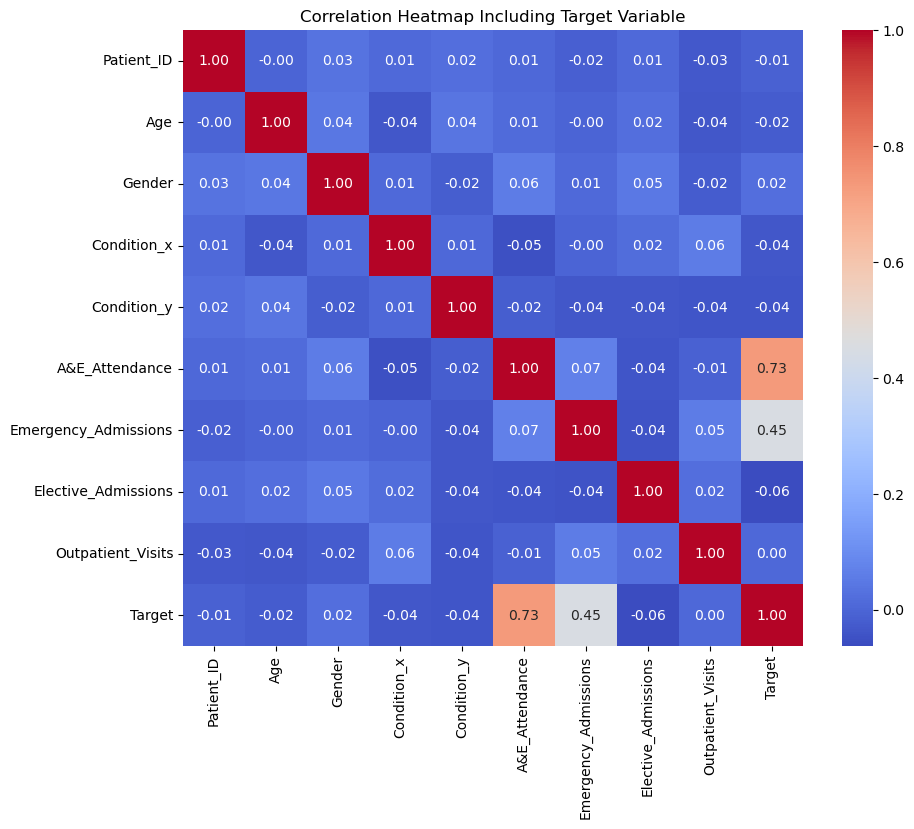

In [7]:
# Check target variable distribution if it exists
if 'Target' in data.columns:
    display("\nTarget Variable Distribution:")
    display(data['Target'].value_counts().to_frame())
else:
    display("\nNo target column found in the dataset.")

# Define Target Variable: Readmission or Emergency Visit
data['Target'] = ((data['A&E_Attendance'] > 0) | (data['Emergency_Admissions'] > 0)).astype(int)

# Check distribution of the new target variable
target_distribution = data['Target'].value_counts().reset_index()
target_distribution.columns = ['Target', 'Count']
display("\nTarget Variable Distribution After Creation:")
display(target_distribution)

# 2. Explore Numerical Features
display("\nNumerical Feature Summary:")
display(data.describe())

# 3. Explore Categorical Features
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    display(f"\nCategorical Summary for {col}:")
    display(data[col].value_counts().to_frame())

# 4. Identify Correlations (if applicable)
# Include the newly defined target variable in correlation analysis
numerical_columns = data.select_dtypes(include=['float64', 'int64'])
if 'Target' in data.columns:
    numerical_columns = numerical_columns.join(data['Target'])

if len(numerical_columns.columns) > 1:  # Ensure enough numerical columns are present
    correlation_matrix = numerical_columns.corr()  # Compute correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title("Correlation Heatmap Including Target Variable")
    plt.show()
else:
    display("\nNot enough numerical data to compute correlations.")

# Check for any correlation in missing data
missing_corr = data.isnull().corr()
if not missing_corr.dropna().empty:
    corr_columns = missing_corr[missing_corr.abs() > 0.5].unstack().dropna().reset_index()
    corr_columns.columns = ['Column1', 'Column2', 'Correlation']
    if not corr_columns.empty:
        display("\nCorrelations in Missing Data:")
        display(corr_columns)


- CHECKING FOR MISSING COLUMNS

In [8]:
# Recalculate the missing data summary
missing_data_summary = data.isnull().sum().reset_index()
missing_data_summary.columns = ['Column', 'Missing Values']
missing_data_summary['Percentage Missing'] = (missing_data_summary['Missing Values'] / len(data)) * 100

# Add a column to specify the data type (Numerical or Categorical)
missing_data_summary['Data Type'] = missing_data_summary['Column'].apply(
    lambda col: 'Numerical' if data[col].dtype in ['float64', 'int64'] else 'Categorical'
)

# Filter only columns with missing values
missing_columns_to_check = missing_data_summary[missing_data_summary['Missing Values'] > 0]

# Display the updated missing columns summary
print("Missing Columns Analysis with Data Types:\n")
print(missing_columns_to_check.to_string(index=False))


Missing Columns Analysis with Data Types:

Empty DataFrame
Columns: [Column, Missing Values, Percentage Missing, Data Type]
Index: []


- FEATURE ENGINEERING

In [9]:
import pandas as pd

# **Step 1: Load the Dataset**
file_path = r'C:\Users\HP\OneDrive\GLOCESTER NHS\Adverse_Prediction.csv'
data = pd.read_csv(file_path)

# **Step 2: Handle Missing Data in Numerical Columns**
# Fill missing values in numerical columns with the median
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if data[col].isna().any():
        data[col] = data[col].fillna(data[col].median())
        print(f"Filled missing values in '{col}' with median.")

# **Step 3: Handle Missing Data in Categorical Columns**
# Fill missing values in categorical columns with the mode
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if data[col].isna().any():
        data[col] = data[col].fillna(data[col].mode()[0])
        print(f"Filled missing values in '{col}' with mode: {data[col].mode()[0]}.")

# **Step 4: Save the Cleaned Dataset**
output_file_path = r'C:\Users\HP\OneDrive\GLOCESTER NHS\Adverse_Prediction_Cleaned.csv'
data.to_csv(output_file_path, index=False)
print(f"Cleaned dataset saved to {output_file_path}")


Filled missing values in 'Patient_ID' with median.
Filled missing values in 'Age' with median.
Filled missing values in 'A&E_Attendance' with median.
Filled missing values in 'Emergency_Admissions' with median.
Filled missing values in 'Elective_Admissions' with median.
Filled missing values in 'Outpatient_Visits' with median.
Filled missing values in 'Gender' with mode: Female.
Filled missing values in 'Condition_x' with mode: Asthma.
Filled missing values in 'Condition_y' with mode: Hypertension.
Filled missing values in 'Medication' with mode: Salbutamol.
Filled missing values in 'Procedures' with mode: Appendectomy.
Filled missing values in 'Social_Care_Package' with mode: Respite Care.
Cleaned dataset saved to C:\Users\HP\OneDrive\GLOCESTER NHS\Adverse_Prediction_Cleaned.csv


In [10]:
import pandas as pd

# Load the cleaned dataset
cleaned_data = pd.read_csv('Adverse_Prediction_Cleaned.csv')

# Check for any remaining missing values
missing_data_summary = cleaned_data.isnull().sum().reset_index()
missing_data_summary.columns = ['Column', 'Missing Values']
missing_data_summary['Percentage Missing'] = (missing_data_summary['Missing Values'] / len(cleaned_data)) * 100

# Filter for columns with missing values
missing_columns_remaining = missing_data_summary[missing_data_summary['Missing Values'] > 0]

# Display the results
if missing_columns_remaining.empty:
    print("All missing values have been handled. No columns with missing data remain.")
else:
    print("Columns with remaining missing values:")
    print(missing_columns_remaining)


All missing values have been handled. No columns with missing data remain.


- 2. ONE- HOT ENCODING STEPS

In [11]:
import pandas as pd

# **Step 1: Load the Dataset**
file_path = r'C:\Users\HP\OneDrive\GLOCESTER NHS\Adverse_Prediction.csv'
data = pd.read_csv(file_path)

# **Feature Engineering: Handle Missing Data in Numerical Columns**
# **What We Did**: Filled missing values in numerical columns with the median.
# **Why We Did It**: Using the median ensures that outliers in numerical data do not skew the imputation, maintaining the integrity of the dataset for the predictive model.
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if data[col].isna().any():
        data[col] = data[col].fillna(data[col].median())
        print(f"Filled missing values in '{col}' with median.")

# **Feature Engineering: Handle Missing Data in Categorical Columns**
# **What We Did**: Filled missing values in categorical columns with the mode.
# **Why We Did It**: Using the mode ensures that the most frequent category represents the missing data, preserving the consistency of categorical distributions for the predictive model.
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if data[col].isna().any():
        data[col] = data[col].fillna(data[col].mode()[0])
        print(f"Filled missing values in '{col}' with mode: {data[col].mode()[0]}.")

# **Step 4: Save the Cleaned Dataset**
# **What We Did**: Saved the cleaned dataset to the new directory.
# **Why We Did It**: The cleaned dataset is now ready for model training and testing, ensuring consistent input without missing values for accurate predictive performance.
output_file_path = r'C:\Users\HP\OneDrive\GLOCESTER NHS\Adverse_Prediction_Cleaned.csv'
data.to_csv(output_file_path, index=False)
print(f"Cleaned dataset saved to {output_file_path}")


Filled missing values in 'Patient_ID' with median.
Filled missing values in 'Age' with median.
Filled missing values in 'A&E_Attendance' with median.
Filled missing values in 'Emergency_Admissions' with median.
Filled missing values in 'Elective_Admissions' with median.
Filled missing values in 'Outpatient_Visits' with median.
Filled missing values in 'Gender' with mode: Female.
Filled missing values in 'Condition_x' with mode: Asthma.
Filled missing values in 'Condition_y' with mode: Hypertension.
Filled missing values in 'Medication' with mode: Salbutamol.
Filled missing values in 'Procedures' with mode: Appendectomy.
Filled missing values in 'Social_Care_Package' with mode: Respite Care.
Cleaned dataset saved to C:\Users\HP\OneDrive\GLOCESTER NHS\Adverse_Prediction_Cleaned.csv


- FAETURE ENGINEERING STEPS

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# **Step 1: Load the Dataset**
file_path = r'C:\Users\HP\OneDrive\GLOCESTER NHS\Adverse_Prediction_Cleaned.csv'
data = pd.read_csv(file_path)

# **Feature Engineering: Encode Categorical Variables**
# **What We Did**: One-hot encoded nominal variables like 'Medication', 'Procedures', and 'Social_Care_Package' and binary-encoded 'Gender'.
# **Why We Did It**: This converts categorical variables into a format suitable for machine learning models, ensuring they can process and learn from these features.
nominal_columns = ['Medication', 'Procedures', 'Social_Care_Package']
data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

gender_mapping = {'Male': 1, 'Female': 0}
data['Gender'] = data['Gender'].map(gender_mapping)

condition_mapping = {'Diabetes': 0, 'Hypertension': 1, 'Asthma': 2}
data['Condition_x'] = data['Condition_x'].map(condition_mapping)
data['Condition_y'] = data['Condition_y'].map(condition_mapping)

# **Feature Engineering: Scale Numerical Variables**
# **What We Did**: Scaled numerical variables using `StandardScaler`.
# **Why We Did It**: Scaling ensures that numerical features are on the same scale, preventing variables with larger ranges from dominating the model.
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# **Feature Engineering: Create New Features**
# **What We Did**: Created new features such as 'Total_Healthcare_Visits', 'High_Risk_Medication', 'Comorbidities_Count', and 'Has_Social_Care'.
# **Why We Did It**: These derived features provide more nuanced insights into patient health and care utilization, enhancing model prediction capabilities.

# 1. Total Healthcare Visits
data['Total_Healthcare_Visits'] = data['A&E_Attendance'] + data['Emergency_Admissions'] + data['Elective_Admissions']

# 2. High-Risk Medication Flag
# Since Medication_Lisinopril is missing, use available medication columns
critical_meds = ['Medication_Metformin', 'Medication_Salbutamol']
data['High_Risk_Medication'] = data[critical_meds].sum(axis=1)

# 3. Count of Comorbidities
chronic_conditions = ['Diabetes', 'Hypertension', 'Asthma']
data['Comorbidities_Count'] = data[['Condition_x', 'Condition_y']].apply(
    lambda x: sum([1 for condition in chronic_conditions if condition in x.values]), axis=1
)

# 4. Social Care Flag
if 'Social_Care_Package_Respite Care' in data.columns:
    data['Has_Social_Care'] = data['Social_Care_Package_Respite Care']
else:
    print("'Social_Care_Package_Respite Care' column not found.")

# **Step 2: Save the Fully Processed Dataset**
# **What We Did**: Saved the processed dataset to the specified directory.
# **Why We Did It**: The processed dataset is ready for model training, containing all necessary transformations and engineered features.
output_file_path = r'C:\Users\HP\OneDrive\GLOCESTER NHS\Adverse_Prediction_Featured_Engineer.csv'
data.to_csv(output_file_path, index=False)
print(f"Fully processed dataset saved as '{output_file_path}'")


Fully processed dataset saved as 'C:\Users\HP\OneDrive\GLOCESTER NHS\Adverse_Prediction_Featured_Engineer.csv'


- CLASS IMBLANACE AND DATA SPLITTING

Class Distribution in the Dataset:
Class_Description
High-Risk Patients    0.798
Low-Risk Patients     0.202
Name: proportion, dtype: float64


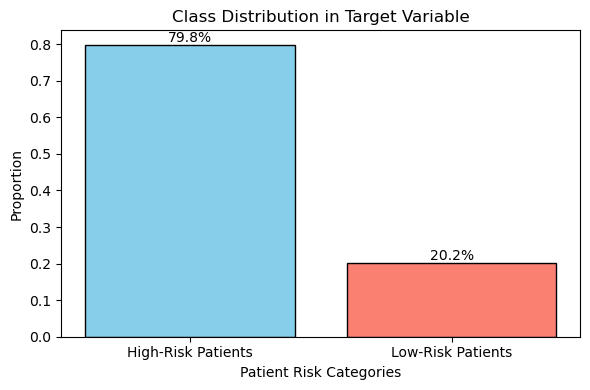

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the feature-engineered dataset
data = pd.read_csv('Adverse_Prediction_Featured_Engineer.csv')

# Define the target column and what each class represents
target_col = 'High_Risk_Medication'  # Target column
class_labels = {
    0: "Low-Risk Patients",
    1: "High-Risk Patients"
}

# Map the class labels for clarity
data['Class_Description'] = data[target_col].map(class_labels)

# Check class balance in the target variable
class_distribution = data['Class_Description'].value_counts(normalize=True)
print("Class Distribution in the Dataset:")
print(class_distribution)

# Visualize class distribution
plt.figure(figsize=(6, 4))
bars = plt.bar(class_distribution.index, class_distribution, color=['skyblue', 'salmon'], edgecolor='black')

# Add percentage labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.1%}", ha='center', va='bottom')

# Customize the plot
plt.grid(False)  # Remove gridlines
plt.title("Class Distribution in Target Variable")
plt.xlabel("Patient Risk Categories")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- HANDLING CLASS IMBALANCE

Class Distribution Before Balancing:
Class_Description
High-Risk Patients    0.798
Low-Risk Patients     0.202
Name: proportion, dtype: float64

Class Distribution After Balancing:
Class_Description
High-Risk Patients    0.5
Low-Risk Patients     0.5
Name: proportion, dtype: float64


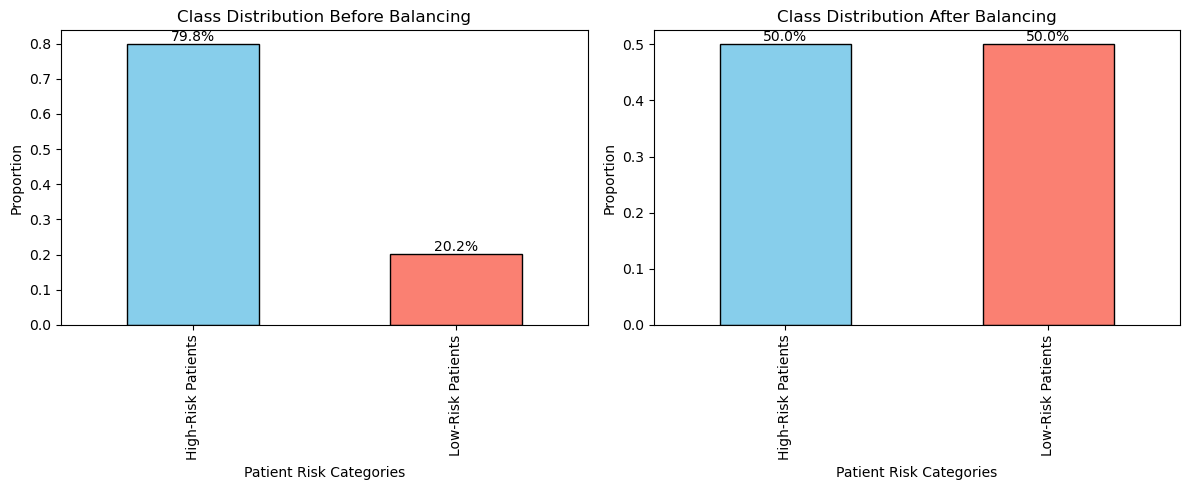


Balanced Dataset Preview:
   Patient_ID       Age    Gender  Condition_x  Condition_y  A&E_Attendance  \
0   -1.536976  0.674573  1.240190     0.743184    -0.025828       -0.619509   
1   -1.571811 -1.246984 -0.806328    -0.505865    -0.025828        0.880513   
2    1.598209  1.902235 -0.806328    -1.754914    -0.025828       -0.619509   
3    0.777642  0.781326  1.240190     0.743184    -0.025828       -0.619509   
4    1.408549 -0.392958 -0.806328    -0.505865    -0.025828       -0.619509   

   Emergency_Admissions  Elective_Admissions  Outpatient_Visits  \
0             -0.411220            -0.463461           1.096941   
1             -0.411220            -0.463461          -1.121342   
2             -0.411220            -0.463461          -0.012201   
3             -0.411220             1.569261          -1.121342   
4              4.157896             1.569261          -0.012201   

   Medication_Metformin  Medication_Salbutamol  Procedures_Knee Replacement  \
0               

In [14]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Adverse_Prediction_Featured_Engineer.csv')

# Define the target column and what each class represents
target_col = 'High_Risk_Medication'
class_labels = {
    0: "Low-Risk Patients",
    1: "High-Risk Patients"
}

# Map the class labels for clarity
data['Class_Description'] = data[target_col].map(class_labels)

# Split data into "High-Risk" and "Low-Risk" categories
high_risk = data[data['High_Risk_Medication'] == 1]
low_risk = data[data['High_Risk_Medication'] == 0]

# Undersample the high-risk class to match the size of the low-risk class
high_risk_undersampled = resample(high_risk, n_samples=len(low_risk), random_state=42)

# Combine the undersampled high-risk data with the low-risk data
balanced_data = pd.concat([high_risk_undersampled, low_risk])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Map class descriptions for the balanced dataset
balanced_data['Class_Description'] = balanced_data[target_col].map(class_labels)

# Show class distribution before and after balancing
print("Class Distribution Before Balancing:")
print(data['Class_Description'].value_counts(normalize=True))

print("\nClass Distribution After Balancing:")
print(balanced_data['Class_Description'].value_counts(normalize=True))

# Function to add percentage labels to bars
def add_percentage_labels(ax):
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.1%}",
            ha='center',
            va='bottom',
            fontsize=10
        )

# Visualize class distribution before and after balancing
plt.figure(figsize=(12, 5))

# Before balancing
plt.subplot(1, 2, 1)
ax1 = data['Class_Description'].value_counts(normalize=True).plot(
    kind='bar', color=['skyblue', 'salmon'], edgecolor='black'
)
add_percentage_labels(ax1)
plt.title("Class Distribution Before Balancing")
plt.xlabel("Patient Risk Categories")
plt.ylabel("Proportion")
plt.grid(False)

# After balancing
plt.subplot(1, 2, 2)
ax2 = balanced_data['Class_Description'].value_counts(normalize=True).plot(
    kind='bar', color=['skyblue', 'salmon'], edgecolor='black'
)
add_percentage_labels(ax2)
plt.title("Class Distribution After Balancing")
plt.xlabel("Patient Risk Categories")
plt.ylabel("Proportion")
plt.grid(False)

plt.tight_layout()
plt.show()

# Display first few rows of the balanced dataset
print("\nBalanced Dataset Preview:")
print(balanced_data.head())


Define Features and Target

In [15]:
# Define features (X) and target (y)
X = data.drop(columns=['High_Risk_Medication'])  # Features (exclude the target column)
y = data['High_Risk_Medication']  # Target column


Split Data into Training, Validation, and Test Sets

In [16]:
from sklearn.model_selection import train_test_split

# Split into training and remaining sets (70% training, 30% remaining)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Split remaining data into validation and test sets (15% validation, 15% test)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, stratify=y_remaining, random_state=42)

# Print class distributions
print("\nClass Distribution in Training Set:")
print(y_train.value_counts(normalize=True))

print("\nClass Distribution in Validation Set:")
print(y_val.value_counts(normalize=True))

print("\nClass Distribution in Testing Set:")
print(y_test.value_counts(normalize=True))

# Confirm shapes
print("\nTraining set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)



Class Distribution in Training Set:
High_Risk_Medication
1    0.798571
0    0.201429
Name: proportion, dtype: float64

Class Distribution in Validation Set:
High_Risk_Medication
1    0.8
0    0.2
Name: proportion, dtype: float64

Class Distribution in Testing Set:
High_Risk_Medication
1    0.793333
0    0.206667
Name: proportion, dtype: float64

Training set shape (X_train, y_train): (700, 17) (700,)
Validation set shape (X_val, y_val): (150, 17) (150,)
Testing set shape (X_test, y_test): (150, 17) (150,)


In [17]:
from sklearn.model_selection import train_test_split

# Ensure correct features and target are used
# Exclude 'Class_Description' and target column ('High_Risk_Medication') from features
X = data.drop(columns=['High_Risk_Medication', 'Class_Description'])
y = data['High_Risk_Medication']

# Split into training (70%) and remaining (30%) sets
X_train, X_remaining, y_train, y_remaining = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Split the remaining data into validation (15%) and test (15%) sets
X_val, X_test, y_val, y_test = train_test_split(
    X_remaining, y_remaining, test_size=0.5, stratify=y_remaining, random_state=42
)

# Print class distributions
print("\nClass Distribution in Training Set:")
print(y_train.value_counts(normalize=True))

print("\nClass Distribution in Validation Set:")
print(y_val.value_counts(normalize=True))

print("\nClass Distribution in Testing Set:")
print(y_test.value_counts(normalize=True))

# Confirm dataset shapes
print("\nTraining set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)



Class Distribution in Training Set:
High_Risk_Medication
1    0.798571
0    0.201429
Name: proportion, dtype: float64

Class Distribution in Validation Set:
High_Risk_Medication
1    0.8
0    0.2
Name: proportion, dtype: float64

Class Distribution in Testing Set:
High_Risk_Medication
1    0.793333
0    0.206667
Name: proportion, dtype: float64

Training set shape (X_train, y_train): (700, 16) (700,)
Validation set shape (X_val, y_val): (150, 16) (150,)
Testing set shape (X_test, y_test): (150, 16) (150,)


Define Models and Preprocessing Pipelines

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# Define model pipelines
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()), 
        ('lr', LogisticRegression(max_iter=1000))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()), 
        ('rf', RandomForestClassifier())
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()), 
        ('xgb', XGBClassifier(eval_metric='logloss'))
    ]),
    'LightGBM': Pipeline([
        ('scaler', StandardScaler()), 
        ('lgb', lgb.LGBMClassifier())
    ]),
    'CatBoost': Pipeline([
        ('scaler', StandardScaler()), 
        ('catboost', CatBoostClassifier(verbose=0))
    ])
}

Define Hyperparameter Grids

In [19]:
param_grids = {
    'Logistic Regression': {'lr__C': [0.1, 1, 10]},
    'Random Forest': {'rf__n_estimators': [100, 200], 'rf__max_depth': [10, 20, None]},
    'XGBoost': {'xgb__max_depth': [3, 5, 7], 'xgb__learning_rate': [0.01, 0.1]},
    'LightGBM': {'lgb__num_leaves': [31, 63], 'lgb__learning_rate': [0.01, 0.1]},
    'CatBoost': {'catboost__learning_rate': [0.01, 0.1], 'catboost__depth': [4, 6, 8]}
}


Perform GridSearchCV for Each Model

In [20]:
from sklearn.model_selection import GridSearchCV

# Dictionary to store GridSearchCV results
grid_searches = {}

# Perform GridSearchCV for each model
for model_name, model_pipeline in models.items():
    if model_name in param_grids:
        print(f"\nPerforming GridSearchCV for {model_name}...")
        grid_search = GridSearchCV(
            model_pipeline,
            param_grids[model_name],
            cv=3,
            n_jobs=-1,
            scoring='accuracy'
        )
        grid_search.fit(X_train, y_train)
        grid_searches[model_name] = grid_search

        # Print best parameters and best score
        print(f"Best Params for {model_name}: {grid_search.best_params_}")
        print(f"Best Score: {grid_search.best_score_:.3f}")



Performing GridSearchCV for Logistic Regression...
Best Params for Logistic Regression: {'lr__C': 0.1}
Best Score: 1.000

Performing GridSearchCV for Random Forest...
Best Params for Random Forest: {'rf__max_depth': 10, 'rf__n_estimators': 100}
Best Score: 1.000

Performing GridSearchCV for XGBoost...
Best Params for XGBoost: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 3}
Best Score: 1.000

Performing GridSearchCV for LightGBM...
[LightGBM] [Info] Number of positive: 559, number of negative: 141
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798571 -> initscore=1.377390
[LightGBM] [Info] Start training from score 1.377390
[LightGBM] [W

Evaluate Models on Validation Set

Evaluate Best Models on Test Set

In [21]:
from sklearn.model_selection import GridSearchCV

# Dictionary to store GridSearchCV results
grid_searches = {}

# Perform GridSearchCV for each model
for model_name, model_pipeline in models.items():
    if model_name in param_grids:
        print(f"\nPerforming GridSearchCV for {model_name}...")
        grid_search = GridSearchCV(
            model_pipeline,
            param_grids[model_name],
            cv=3,
            n_jobs=-1,
            scoring='accuracy'
        )
        grid_search.fit(X_train, y_train)
        grid_searches[model_name] = grid_search

        # Print best parameters and best score
        print(f"Best Params for {model_name}: {grid_search.best_params_}")
        print(f"Best Score: {grid_search.best_score_:.3f}")


Performing GridSearchCV for Logistic Regression...
Best Params for Logistic Regression: {'lr__C': 0.1}
Best Score: 1.000

Performing GridSearchCV for Random Forest...
Best Params for Random Forest: {'rf__max_depth': 10, 'rf__n_estimators': 100}
Best Score: 1.000

Performing GridSearchCV for XGBoost...
Best Params for XGBoost: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 3}
Best Score: 1.000

Performing GridSearchCV for LightGBM...
[LightGBM] [Info] Number of positive: 559, number of negative: 141
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798571 -> initscore=1.377390
[LightGBM] [Info] Start training from score 1.377390
[LightGBM] [W

- Evaluation of Model Performance

In [22]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Evaluate each model's performance
print("\nModel Performance on Test Set:")

# Dictionary to store test scores for comparison
test_results = {}

for model_name, grid_search in grid_searches.items():
    print(f"\nEvaluating {model_name}...")
    
    # Best model from GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Predictions on the test set
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
    auc_roc = roc_auc_score(y_test, y_prob)
    
    # Store results
    test_results[model_name] = {
        'Accuracy': accuracy,
        'AUC-ROC': auc_roc
    }
    
    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"AUC-ROC: {auc_roc:.2f}")
    print("Classification Report:")
    print(classification_rep)

# Display test results for all models
print("\nSummary of Test Results:")
for model_name, metrics in test_results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.2f}, AUC-ROC = {metrics['AUC-ROC']:.2f}")


Model Performance on Test Set:

Evaluating Logistic Regression...
Accuracy: 1.00
AUC-ROC: 1.00
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        31
     Class 1       1.00      1.00      1.00       119

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


Evaluating Random Forest...
Accuracy: 1.00
AUC-ROC: 1.00
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        31
     Class 1       1.00      1.00      1.00       119

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


Evaluating XGBoost...
Accuracy: 1.00
AUC-ROC: 1.00
Classification Report:
              precision    recall  f1-score   support

     Class 0    

In [23]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Evaluate each model's performance
print("\nModel Performance on Test Set:")

# Dictionary to store test scores for comparison
test_results = {}

# Map numeric classes to descriptive class labels
target_names = ['Low-Risk Patients', 'High-Risk Patients']

for model_name, grid_search in grid_searches.items():
    print(f"\nEvaluating {model_name}...")
    
    # Best model from GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Predictions on the test set
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=target_names)
    auc_roc = roc_auc_score(y_test, y_prob)
    
    # Store results
    test_results[model_name] = {
        'Accuracy': accuracy,
        'AUC-ROC': auc_roc
    }
    
    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"AUC-ROC: {auc_roc:.2f}")
    print("Classification Report:")
    print(classification_rep)

# Display test results for all models
print("\nSummary of Test Results:")
for model_name, metrics in test_results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.2f}, AUC-ROC = {metrics['AUC-ROC']:.2f}")



Model Performance on Test Set:

Evaluating Logistic Regression...
Accuracy: 1.00
AUC-ROC: 1.00
Classification Report:
                    precision    recall  f1-score   support

 Low-Risk Patients       1.00      1.00      1.00        31
High-Risk Patients       1.00      1.00      1.00       119

          accuracy                           1.00       150
         macro avg       1.00      1.00      1.00       150
      weighted avg       1.00      1.00      1.00       150


Evaluating Random Forest...
Accuracy: 1.00
AUC-ROC: 1.00
Classification Report:
                    precision    recall  f1-score   support

 Low-Risk Patients       1.00      1.00      1.00        31
High-Risk Patients       1.00      1.00      1.00       119

          accuracy                           1.00       150
         macro avg       1.00      1.00      1.00       150
      weighted avg       1.00      1.00      1.00       150


Evaluating XGBoost...
Accuracy: 1.00
AUC-ROC: 1.00
Classification Report:

CONFUSION MATRIX

In [24]:
pip install matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


CONFUSION MATRIX


Model Performance on Test Set:

Evaluating Logistic Regression...
Accuracy: 1.00
AUC-ROC: 1.00
Classification Report:
                    precision    recall  f1-score   support

 Low-Risk Patients       1.00      1.00      1.00        31
High-Risk Patients       1.00      1.00      1.00       119

          accuracy                           1.00       150
         macro avg       1.00      1.00      1.00       150
      weighted avg       1.00      1.00      1.00       150

Saved confusion matrix to C:\Users\HP\OneDrive\GLOCESTER NHS\Confusion_Matrix_Logistic Regression.png


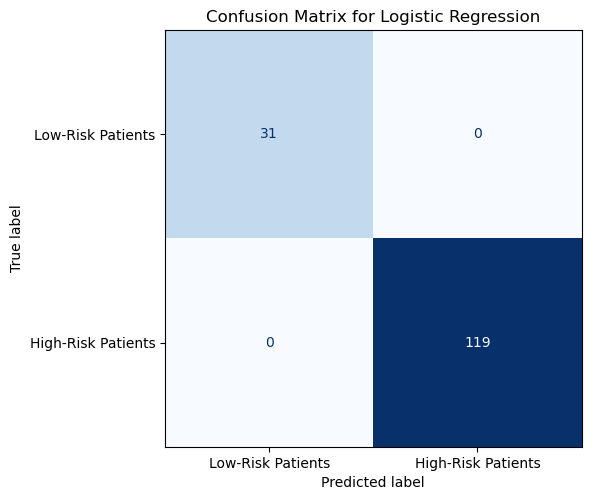


Evaluating Random Forest...
Accuracy: 1.00
AUC-ROC: 1.00
Classification Report:
                    precision    recall  f1-score   support

 Low-Risk Patients       1.00      1.00      1.00        31
High-Risk Patients       1.00      1.00      1.00       119

          accuracy                           1.00       150
         macro avg       1.00      1.00      1.00       150
      weighted avg       1.00      1.00      1.00       150

Saved confusion matrix to C:\Users\HP\OneDrive\GLOCESTER NHS\Confusion_Matrix_Random Forest.png


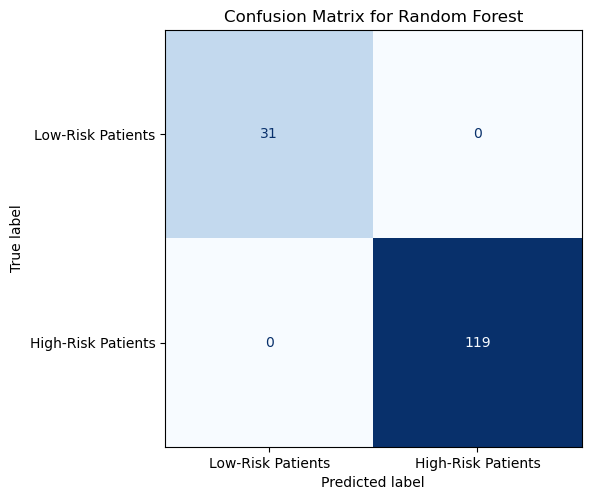


Evaluating XGBoost...
Accuracy: 1.00
AUC-ROC: 1.00
Classification Report:
                    precision    recall  f1-score   support

 Low-Risk Patients       1.00      1.00      1.00        31
High-Risk Patients       1.00      1.00      1.00       119

          accuracy                           1.00       150
         macro avg       1.00      1.00      1.00       150
      weighted avg       1.00      1.00      1.00       150

Saved confusion matrix to C:\Users\HP\OneDrive\GLOCESTER NHS\Confusion_Matrix_XGBoost.png


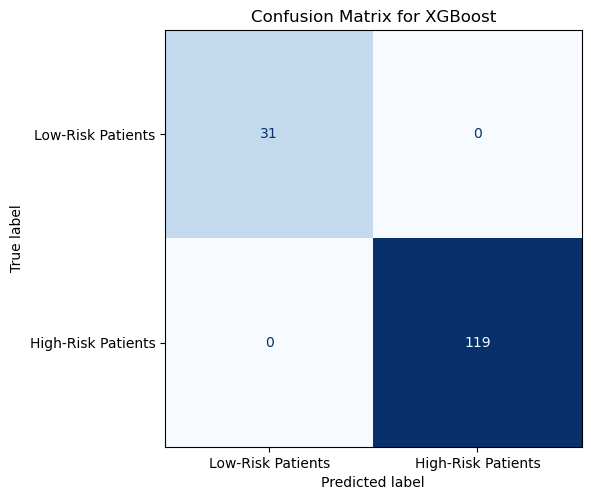


Evaluating LightGBM...
Accuracy: 1.00
AUC-ROC: 1.00
Classification Report:
                    precision    recall  f1-score   support

 Low-Risk Patients       1.00      1.00      1.00        31
High-Risk Patients       1.00      1.00      1.00       119

          accuracy                           1.00       150
         macro avg       1.00      1.00      1.00       150
      weighted avg       1.00      1.00      1.00       150

Saved confusion matrix to C:\Users\HP\OneDrive\GLOCESTER NHS\Confusion_Matrix_LightGBM.png


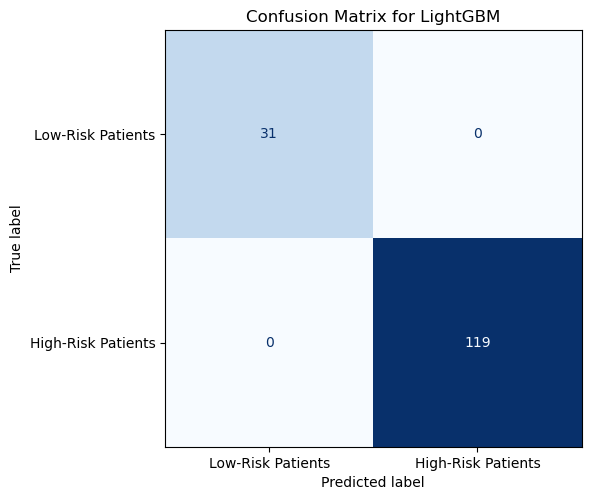


Evaluating CatBoost...
Accuracy: 1.00
AUC-ROC: 1.00
Classification Report:
                    precision    recall  f1-score   support

 Low-Risk Patients       1.00      1.00      1.00        31
High-Risk Patients       1.00      1.00      1.00       119

          accuracy                           1.00       150
         macro avg       1.00      1.00      1.00       150
      weighted avg       1.00      1.00      1.00       150

Saved confusion matrix to C:\Users\HP\OneDrive\GLOCESTER NHS\Confusion_Matrix_CatBoost.png


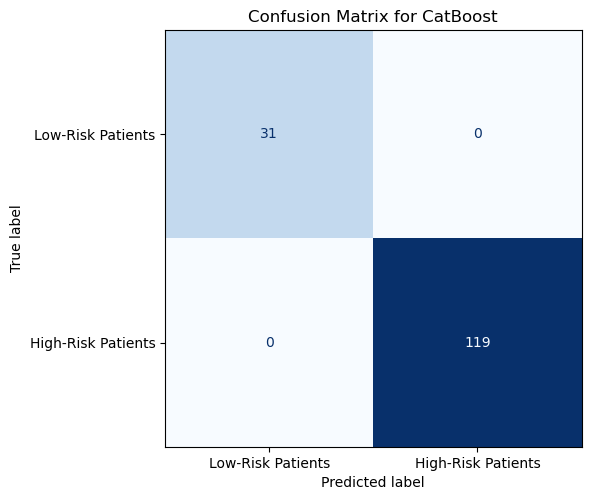


Summary of Test Results:
Logistic Regression: Accuracy = 1.00, AUC-ROC = 1.00
Random Forest: Accuracy = 1.00, AUC-ROC = 1.00
XGBoost: Accuracy = 1.00, AUC-ROC = 1.00
LightGBM: Accuracy = 1.00, AUC-ROC = 1.00
CatBoost: Accuracy = 1.00, AUC-ROC = 1.00


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import os

# Correct class names
class_labels = ['Low-Risk Patients', 'High-Risk Patients']

# Evaluate each model's performance
print("\nModel Performance on Test Set:")

# Dictionary to store test scores for comparison
test_results = {}

for model_name, grid_search in grid_searches.items():
    print(f"\nEvaluating {model_name}...")
    
    # Best model from GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Predictions on the test set
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=class_labels)
    auc_roc = roc_auc_score(y_test, y_prob)
    
    # Store results
    test_results[model_name] = {
        'Accuracy': accuracy,
        'AUC-ROC': auc_roc
    }
    
    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"AUC-ROC: {auc_roc:.2f}")
    print("Classification Report:")
    print(classification_rep)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    
    # Adjust figure size for clarity
    fig, ax = plt.subplots(figsize=(6, 6))  # Adjust size to fit labels
    disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.tight_layout()  # Ensure layout fits

    # Save confusion matrix plot to a file
    output_dir = r'C:\Users\HP\OneDrive\GLOCESTER NHS'
    os.makedirs(output_dir, exist_ok=True)
    file_path = os.path.join(output_dir, f'Confusion_Matrix_{model_name}.png')
    plt.savefig(file_path, bbox_inches="tight")  # Ensure nothing is cut off
    print(f"Saved confusion matrix to {file_path}")
    
    # Display the plot in the notebook
    plt.show()
    plt.close()  # Close the plot after displaying and saving

# Display test results for all models
print("\nSummary of Test Results:")
for model_name, metrics in test_results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.2f}, AUC-ROC = {metrics['AUC-ROC']:.2f}")


- FEATURE IMPORTANCE MY MODEL


Logistic Regression Feature Importance:
Medication_Salbutamol               2.580646
Medication_Metformin                1.815824
Condition_x                         0.087745
Outpatient_Visits                   0.065480
A&E_Attendance                      0.028727
Gender                              0.027337
Condition_y                         0.021463
Age                                 0.015056
Comorbidities_Count                 0.000000
Total_Healthcare_Visits            -0.000637
Social_Care_Package_Respite Care   -0.003681
Has_Social_Care                    -0.003681
Emergency_Admissions               -0.009750
Procedures_Knee Replacement        -0.019537
Elective_Admissions                -0.019989
Patient_ID                         -0.040184
dtype: float64

Random Forest Feature Importance:
Medication_Salbutamol               0.545625
Medication_Metformin                0.294155
Patient_ID                          0.034567
Age                                 0.030942
Total_Hea

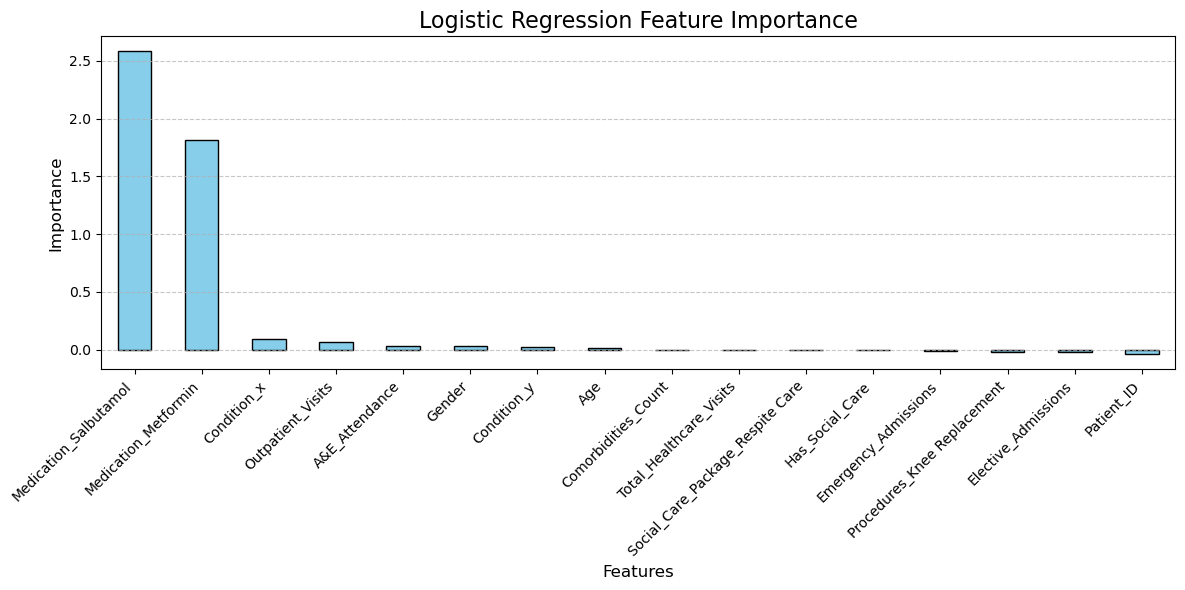

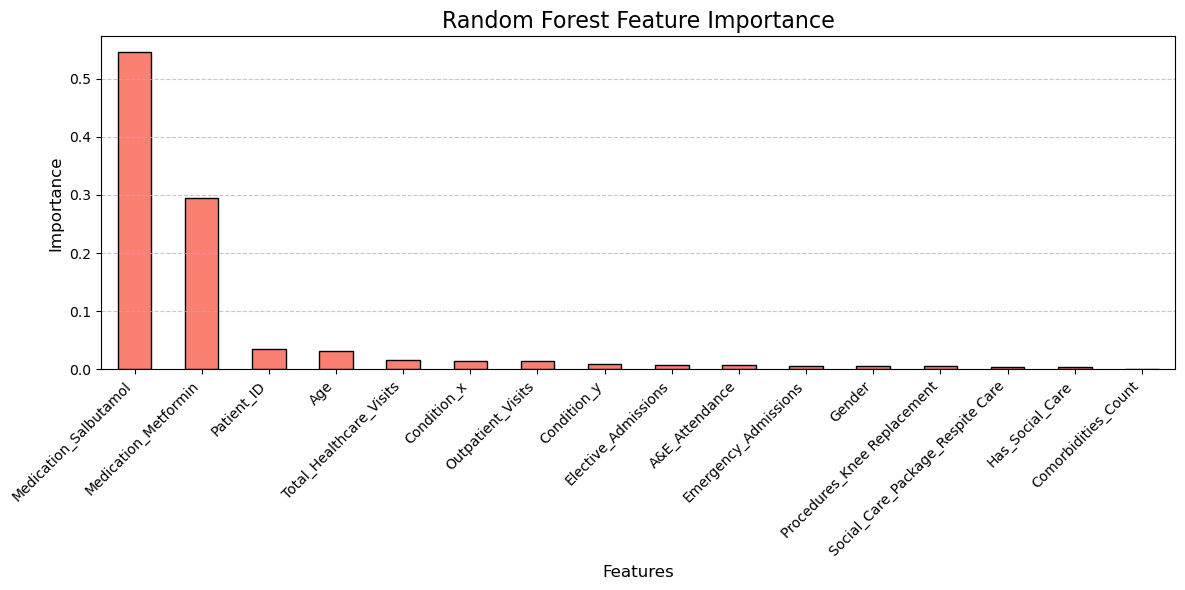

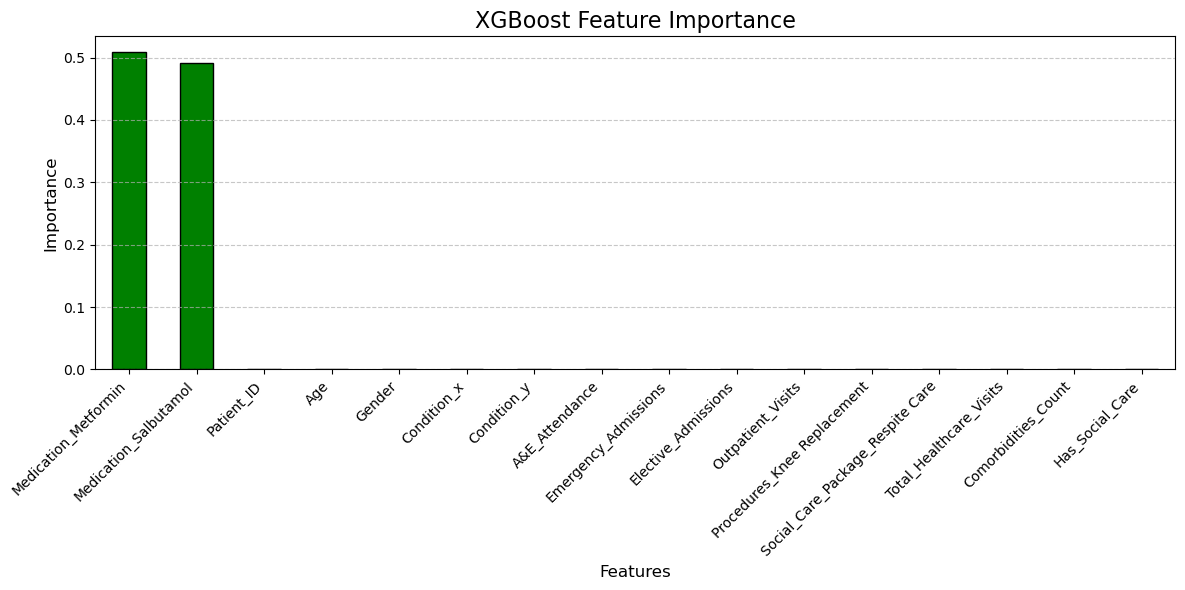

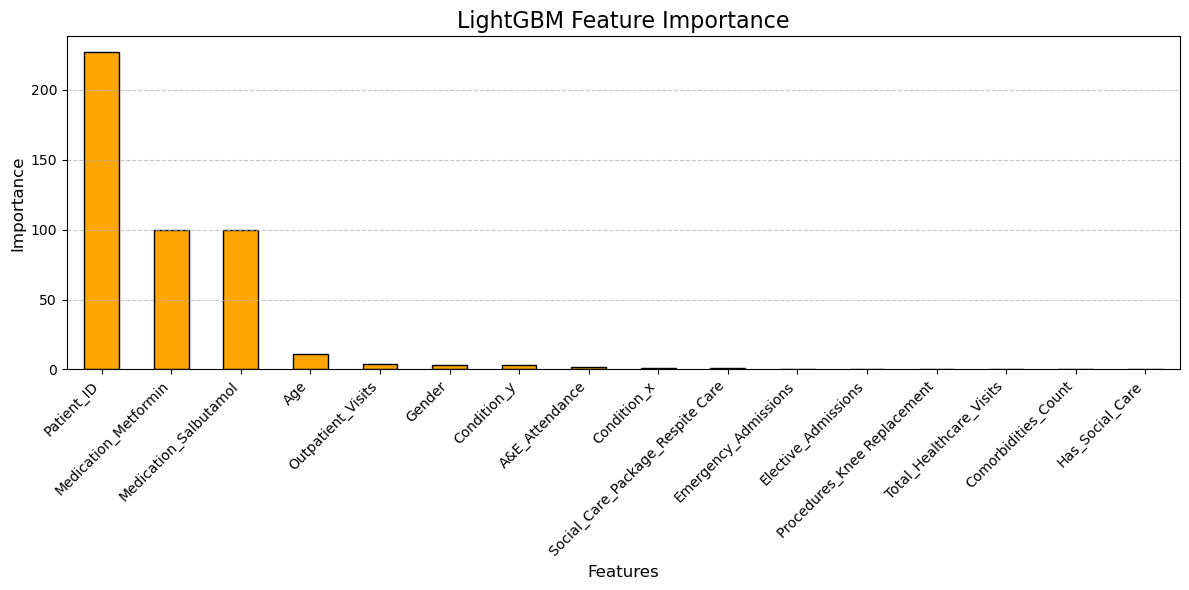

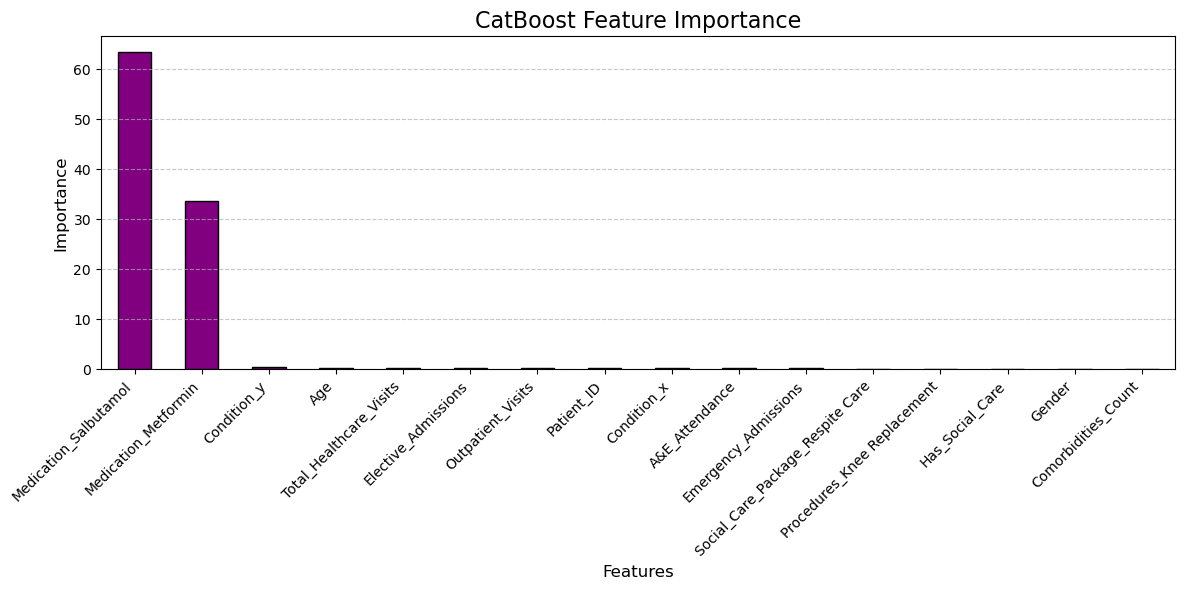

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming best_models are already trained and available (from previous steps)
best_models = {
    'Logistic Regression': grid_searches['Logistic Regression'].best_estimator_,
    'Random Forest': grid_searches['Random Forest'].best_estimator_,
    'XGBoost': grid_searches['XGBoost'].best_estimator_,
    'LightGBM': grid_searches['LightGBM'].best_estimator_,
    'CatBoost': grid_searches['CatBoost'].best_estimator_  # Corrected: added missing underscore
}

# Feature Importance Extraction for each model

# Extract feature importance using the model pipelines
# Ensure that each step in the pipeline that you want to access is correctly named (e.g., 'lr', 'rf')
logreg_feature_importance = pd.Series(best_models['Logistic Regression'].named_steps['lr'].coef_[0], index=X_train.columns).sort_values(ascending=False)
rf_feature_importance = pd.Series(best_models['Random Forest'].named_steps['rf'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
xgb_feature_importance = pd.Series(best_models['XGBoost'].named_steps['xgb'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
lgb_feature_importance = pd.Series(best_models['LightGBM'].named_steps['lgb'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
catboost_feature_importance = pd.Series(best_models['CatBoost'].named_steps['catboost'].feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Printing the feature importance values
print("\nLogistic Regression Feature Importance:")
print(logreg_feature_importance)
print("\nRandom Forest Feature Importance:")
print(rf_feature_importance)
print("\nXGBoost Feature Importance:")
print(xgb_feature_importance)
print("\nLightGBM Feature Importance:")
print(lgb_feature_importance)
print("\nCatBoost Feature Importance:")
print(catboost_feature_importance)

# Function to plot feature importance
def plot_feature_importance(feature_importance, title, color):
    plt.figure(figsize=(12, 6))
    feature_importance.plot(kind='bar', color=color, edgecolor='black')
    plt.title(f"{title} Feature Importance", fontsize=16)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Importance', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plotting feature importances for each model
plot_feature_importance(logreg_feature_importance, "Logistic Regression", 'skyblue')
plot_feature_importance(rf_feature_importance, "Random Forest", 'salmon')
plot_feature_importance(xgb_feature_importance, "XGBoost", 'green')
plot_feature_importance(lgb_feature_importance, "LightGBM", 'orange')
plot_feature_importance(catboost_feature_importance, "CatBoost", 'purple')

In [27]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


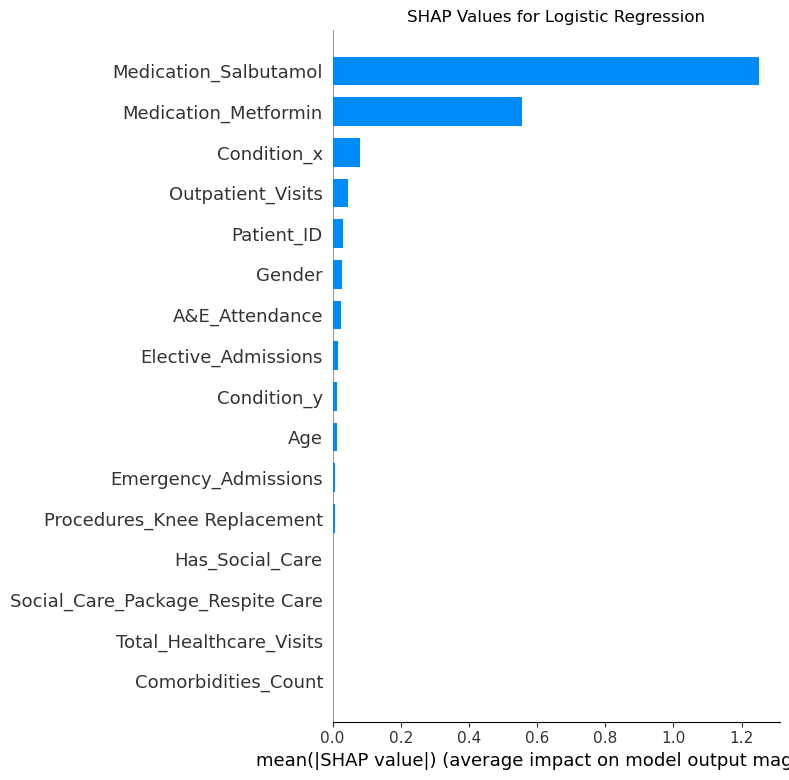

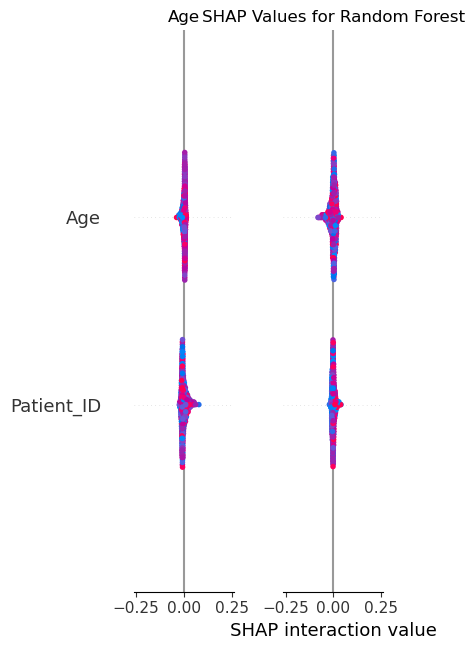

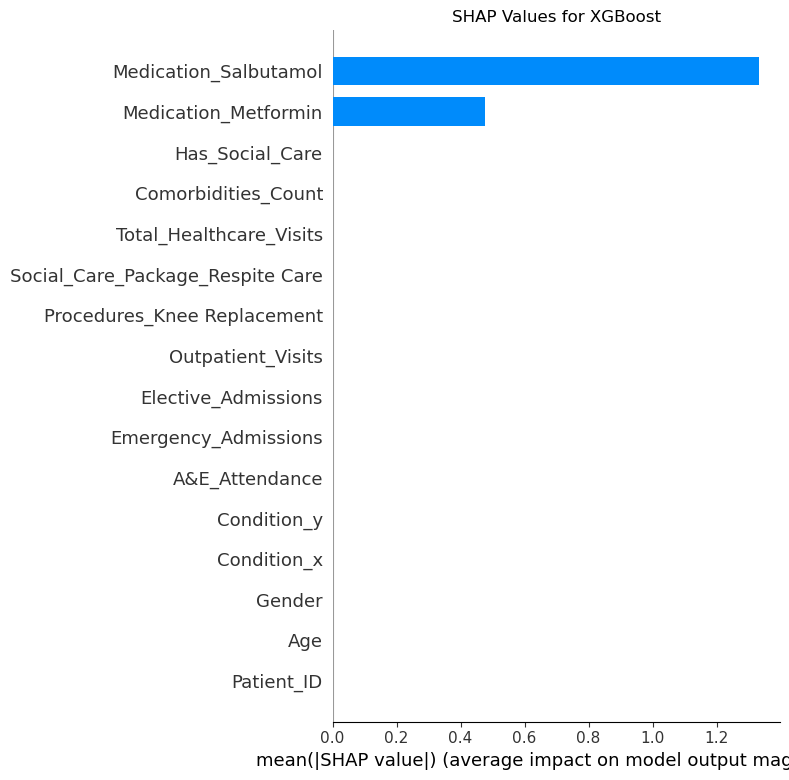

C:\Users\HP\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


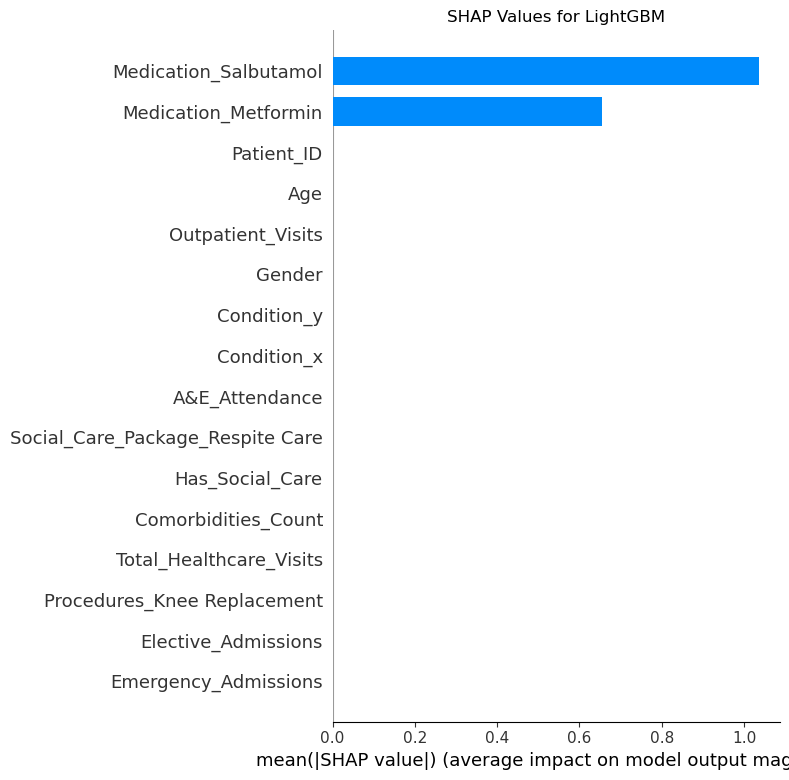

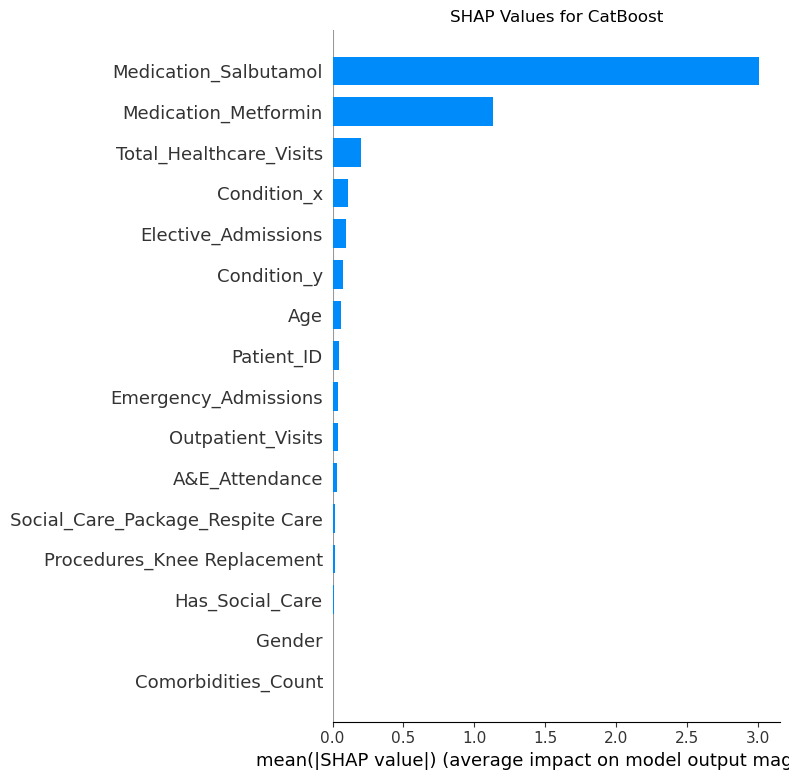

In [28]:
import shap  # Import the SHAP library
import matplotlib.pyplot as plt

# After feature importance analysis
for model_name, best_model in best_models.items():
    if model_name == 'Logistic Regression':
        # For linear models, use shap.LinearExplainer
        explainer = shap.LinearExplainer(best_model.named_steps['lr'], X_train)
    elif model_name == 'Random Forest':
        # For Random Forest, use 'rf'
        explainer = shap.TreeExplainer(best_model.named_steps['rf'])
    elif model_name == 'XGBoost':
        # For XGBoost, use 'xgb'
        explainer = shap.TreeExplainer(best_model.named_steps['xgb'])
    elif model_name == 'LightGBM':
        # For LightGBM, use 'lgb'
        explainer = shap.TreeExplainer(best_model.named_steps['lgb'])
    elif model_name == 'CatBoost':
        # For CatBoost, use 'catboost'
        explainer = shap.TreeExplainer(best_model.named_steps['catboost'])
    else:
        raise KeyError(f"No SHAP explainer configured for model: {model_name}")
    
    # Calculate SHAP values
    shap_values = explainer.shap_values(X_train)
    
    # Generate SHAP summary plot
    shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
    plt.title(f"SHAP Values for {model_name}")
    plt.tight_layout()
    plt.show()


In [29]:
import shap  # Import the SHAP library
import matplotlib.pyplot as plt
import os

# Define the output directory for saving SHAP plots
output_dir = r'C:\Users\HP\OneDrive\GLOCESTER NHS\SHAP_Analysis'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# After feature importance analysis
for model_name, best_model in best_models.items():
    if model_name == 'Logistic Regression':
        # For linear models, use shap.LinearExplainer
        explainer = shap.LinearExplainer(best_model.named_steps['lr'], X_train)
    elif model_name == 'Random Forest':
        # For Random Forest, use shap.TreeExplainer
        explainer = shap.TreeExplainer(best_model.named_steps['rf'])
    elif model_name == 'XGBoost':
        # For XGBoost, use shap.TreeExplainer
        explainer = shap.TreeExplainer(best_model.named_steps['xgb'])
    elif model_name == 'LightGBM':
        # For LightGBM, use shap.TreeExplainer
        explainer = shap.TreeExplainer(best_model.named_steps['lgb'])
    elif model_name == 'CatBoost':
        # For CatBoost, use shap.TreeExplainer
        explainer = shap.TreeExplainer(best_model.named_steps['catboost'])
    else:
        raise KeyError(f"No SHAP explainer configured for model: {model_name}")
    
    # Calculate SHAP values
    shap_values = explainer.shap_values(X_train)
    
    # Generate SHAP summary plot
    shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
    plt.title(f"SHAP Values for {model_name}")
    plt.tight_layout()
    
    # Save the SHAP plot to the directory
    save_path = os.path.join(output_dir, f"SHAP_{model_name}.png")
    plt.savefig(save_path, bbox_inches="tight")
    print(f"SHAP plot for {model_name} saved to: {save_path}")
    plt.close()  # Close the plot to avoid overlap issues


SHAP plot for Logistic Regression saved to: C:\Users\HP\OneDrive\GLOCESTER NHS\SHAP_Analysis\SHAP_Logistic Regression.png
SHAP plot for Random Forest saved to: C:\Users\HP\OneDrive\GLOCESTER NHS\SHAP_Analysis\SHAP_Random Forest.png
SHAP plot for XGBoost saved to: C:\Users\HP\OneDrive\GLOCESTER NHS\SHAP_Analysis\SHAP_XGBoost.png


C:\Users\HP\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


SHAP plot for LightGBM saved to: C:\Users\HP\OneDrive\GLOCESTER NHS\SHAP_Analysis\SHAP_LightGBM.png
SHAP plot for CatBoost saved to: C:\Users\HP\OneDrive\GLOCESTER NHS\SHAP_Analysis\SHAP_CatBoost.png


- BEST MODEL SELECTION AND PREDICTION

In [30]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.



Best Model Selected: Logistic Regression

Best model saved as a .pkl file at: C:\Users\HP\OneDrive\GLOCESTER NHS\Best_Model.pkl

Logistic Regression Test Set Accuracy: 1.00

Classification Report on Test Set:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |        1.00 |     1.00 |       1.00 |     31.00 |
| 1            |        1.00 |     1.00 |       1.00 |    119.00 |
| accuracy     |        1.00 |     1.00 |       1.00 |      1.00 |
| macro avg    |        1.00 |     1.00 |       1.00 |    150.00 |
| weighted avg |        1.00 |     1.00 |       1.00 |    150.00 |

Top 10 High-Risk Patients Based on Predicted Probability:
|     |   Patient_ID |   Predicted_Probability |
|----:|-------------:|------------------------:|
| 130 |     832.0000 |                  0.9788 |
|  59 |     535.0000 |                  0.9774 |
|  38 |       8.0000 |                  0.9761 |
|  20 |     395.0

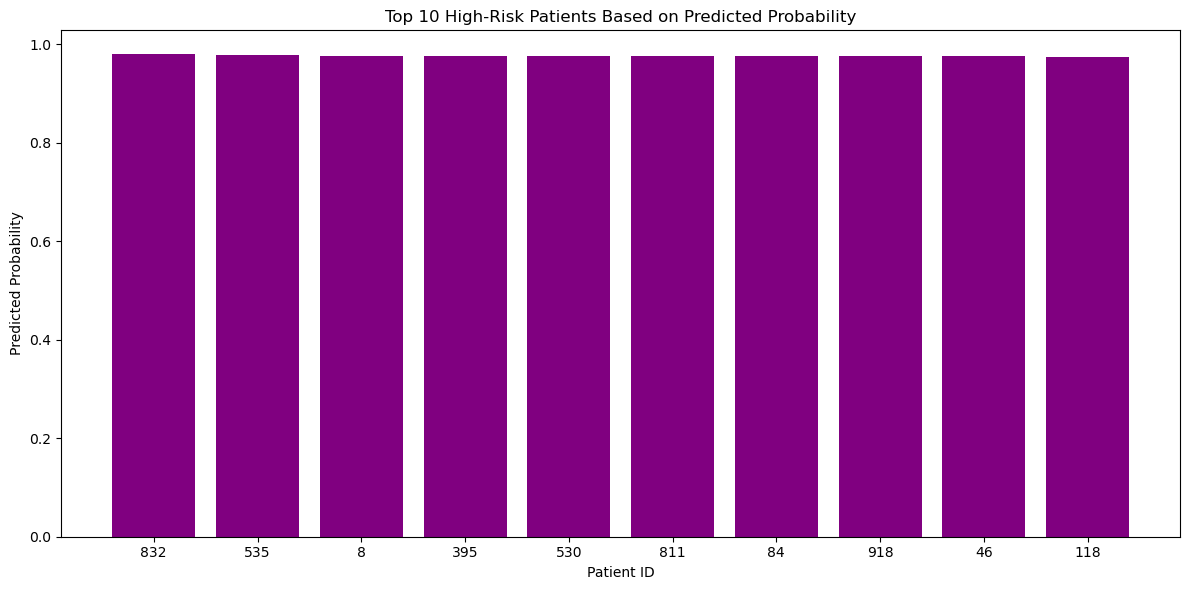

'\nFeature Importances:'

|    | Feature                          |   Importance |
|---:|:---------------------------------|-------------:|
|  0 | Medication_Salbutamol            |       2.5806 |
|  1 | Medication_Metformin             |       1.8158 |
|  2 | Condition_x                      |       0.0877 |
|  3 | Outpatient_Visits                |       0.0655 |
|  4 | A&E_Attendance                   |       0.0287 |
|  5 | Gender                           |       0.0273 |
|  6 | Condition_y                      |       0.0215 |
|  7 | Age                              |       0.0151 |
|  8 | Comorbidities_Count              |       0.0000 |
|  9 | Total_Healthcare_Visits          |      -0.0006 |
| 10 | Social_Care_Package_Respite Care |      -0.0037 |
| 11 | Has_Social_Care                  |      -0.0037 |
| 12 | Emergency_Admissions             |      -0.0097 |
| 13 | Procedures_Knee Replacement      |      -0.0195 |
| 14 | Elective_Admissions              |      -0.0200 |
| 15 | Patient_ID              

In [31]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from tabulate import tabulate

# 1. Select the Best Model:
best_model_name = max(best_models, key=lambda model: best_models[model].score(X_val, y_val))
best_model_instance = best_models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")

# Save the best model as a .pkl file
model_save_path = r"C:\Users\HP\OneDrive\GLOCESTER NHS\Best_Model.pkl"
joblib.dump(best_model_instance, model_save_path)
print(f"\nBest model saved as a .pkl file at: {model_save_path}")

# 2. Make Predictions:
y_pred_test = best_model_instance.predict(X_test)

# 3. Evaluate Model Performance on Test Set:
accuracy = accuracy_score(y_test, y_pred_test)
print(f"\n{best_model_name} Test Set Accuracy: {accuracy:.2f}")

# Print classification report using tabulate for better formatting
report = classification_report(y_test, y_pred_test, output_dict=True)
print("\nClassification Report on Test Set:")
print(tabulate(pd.DataFrame(report).T, headers='keys', tablefmt='pipe', floatfmt=".2f"))

# 4. Rank Patients by Their Risk Scores:
y_pred_prob = best_model_instance.predict_proba(X_test)[:, 1]
ranked_patients = pd.DataFrame({
    'Patient_ID': X_test.index,
    'Predicted_Probability': y_pred_prob
})
ranked_patients = ranked_patients.sort_values(by='Predicted_Probability', ascending=False)
print("\nTop 10 High-Risk Patients Based on Predicted Probability:")
print(tabulate(ranked_patients.head(10), headers='keys', tablefmt='pipe', floatfmt=".4f"))

# Plotting the top 10 high-risk patients
plt.figure(figsize=(12, 6))
plt.bar(ranked_patients['Patient_ID'].head(10).astype(str), ranked_patients['Predicted_Probability'].head(10), color='purple')
plt.title('Top 10 High-Risk Patients Based on Predicted Probability')
plt.xlabel('Patient ID')
plt.ylabel('Predicted Probability')
plt.tight_layout()
plt.show()

# 5. Inspect Features of the Best Model:
if best_model_name == 'Logistic Regression':
    feature_importances = pd.Series(best_model_instance.named_steps['lr'].coef_[0], index=X_train.columns).sort_values(ascending=False)
elif best_model_name == 'Random Forest':
    feature_importances = pd.Series(best_model_instance.named_steps['rf'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
elif best_model_name == 'XGBoost':
    feature_importances = pd.Series(best_model_instance.named_steps['xgb'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
elif best_model_name == 'LightGBM':
    feature_importances = pd.Series(best_model_instance.named_steps['lgb'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
elif best_model_name == 'CatBoost':
    feature_importances = pd.Series(best_model_instance.named_steps['catboost'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
else:
    feature_importances = None
    print("\nFeature importance extraction is not supported for the selected model.")

# Display feature importance
if feature_importances is not None:
    display("\nFeature Importances:")
    print(tabulate(feature_importances.reset_index().rename(columns={0: "Importance", "index": "Feature"}), headers='keys', tablefmt='pipe', floatfmt=".4f"))



Selecting the Best Model Based on Validation Score...

Best Model Selected: Logistic Regression

Best model saved as a .pkl file at: C:\Users\HP\OneDrive\GLOCESTER NHS\Best_Model.pkl

Making Predictions on the Test Set...

Logistic Regression Test Set Accuracy: 100.00%

Classification Report on Test Set:
|                    |   precision |   recall |   f1-score |   support |
|:-------------------|------------:|---------:|-----------:|----------:|
| Low-Risk Patients  |        1.00 |     1.00 |       1.00 |     31.00 |
| High-Risk Patients |        1.00 |     1.00 |       1.00 |    119.00 |
| accuracy           |        1.00 |     1.00 |       1.00 |      1.00 |
| macro avg          |        1.00 |     1.00 |       1.00 |    150.00 |
| weighted avg       |        1.00 |     1.00 |       1.00 |    150.00 |

Ranking Patients by Predicted Risk Scores...

Top 10 High-Risk Patients Based on Predicted Probability:
|     |   Patient_ID |   Predicted_Probability |
|----:|-------------:|------

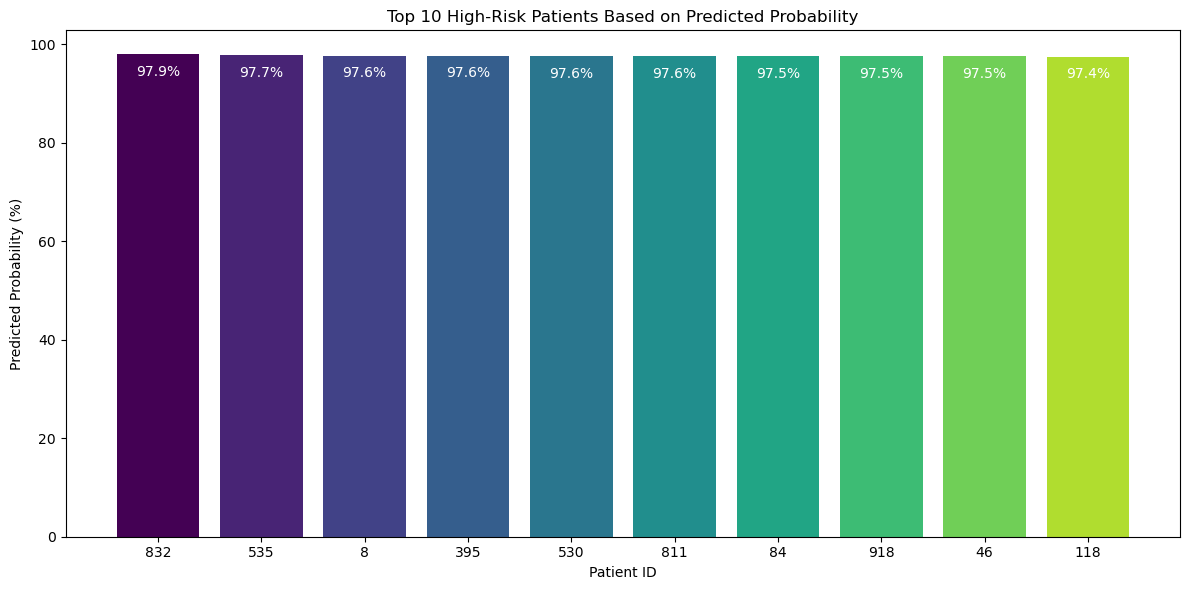

High-risk patient plot saved to: C:\Users\HP\OneDrive\GLOCESTER NHS\Top_10_High_Risk_Patients.png

Inspecting Feature Contributions of the Best Model...

Feature Importances:
|    | Feature                 |   Importance |
|---:|:------------------------|-------------:|
|  0 | Medication_Salbutamol   |       2.5806 |
|  1 | Medication_Metformin    |       1.8158 |
|  2 | Condition_x             |       0.0877 |
|  3 | Outpatient_Visits       |       0.0655 |
|  4 | A&E_Attendance          |       0.0287 |
|  5 | Gender                  |       0.0273 |
|  6 | Condition_y             |       0.0215 |
|  7 | Age                     |       0.0151 |
|  8 | Comorbidities_Count     |       0.0000 |
|  9 | Total_Healthcare_Visits |      -0.0006 |


<Figure size 1000x600 with 0 Axes>

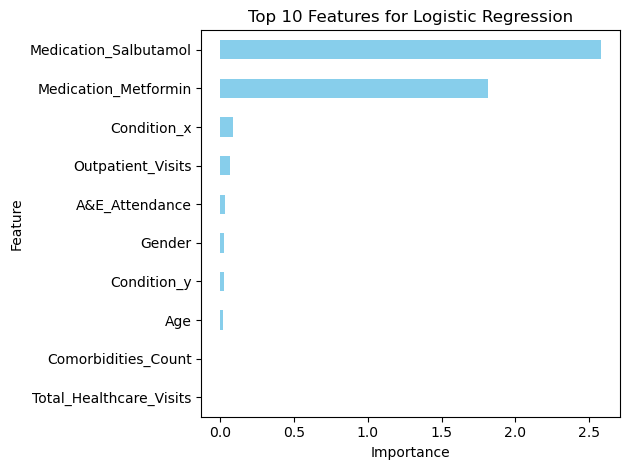

Feature importance plot saved to: C:\Users\HP\OneDrive\GLOCESTER NHS\Top_10_Features.png


In [36]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from tabulate import tabulate

# Define save paths for the plots
save_dir = r"C:\Users\HP\OneDrive\GLOCESTER NHS"
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

# 1. **Select the Best Model**:
print("\nSelecting the Best Model Based on Validation Score...")
best_model_name = max(best_models, key=lambda model: best_models[model].score(X_val, y_val))
best_model_instance = best_models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")

# Save the best model to a file
model_save_path = os.path.join(save_dir, "Best_Model.pkl")
joblib.dump(best_model_instance, model_save_path)
print(f"\nBest model saved as a .pkl file at: {model_save_path}")

# 2. **Make Predictions**:
print("\nMaking Predictions on the Test Set...")
y_pred_test = best_model_instance.predict(X_test)

# 3. **Evaluate Model Performance**:
accuracy = accuracy_score(y_test, y_pred_test)
print(f"\n{best_model_name} Test Set Accuracy: {accuracy:.2%}")

# Generate and print classification report
print("\nClassification Report on Test Set:")
report = classification_report(y_test, y_pred_test, target_names=["Low-Risk Patients", "High-Risk Patients"], output_dict=True)
print(tabulate(pd.DataFrame(report).T, headers="keys", tablefmt="pipe", floatfmt=".2f"))

# 4. **Rank Patients by Predicted Risk**:
print("\nRanking Patients by Predicted Risk Scores...")
y_pred_prob = best_model_instance.predict_proba(X_test)[:, 1]  # Probabilities for High-Risk Patients
ranked_patients = pd.DataFrame({
    'Patient_ID': X_test.index,
    'Predicted_Probability': y_pred_prob
}).sort_values(by='Predicted_Probability', ascending=False)

# Display the top 10 high-risk patients
print("\nTop 10 High-Risk Patients Based on Predicted Probability:")
print(tabulate(ranked_patients.head(10), headers='keys', tablefmt='pipe', floatfmt=".4f"))

# **Plot Top 10 High-Risk Patients**:
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(range(0, 256, int(256 / 10)))  # Generate 10 unique colors
top_10 = ranked_patients.head(10)
bars = plt.bar(top_10['Patient_ID'].astype(str), top_10['Predicted_Probability'] * 100, color=colors)

# Add percentage labels to each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5,
             f"{bar.get_height():.1f}%", ha='center', va='bottom', fontsize=10, color="white")

plt.title('Top 10 High-Risk Patients Based on Predicted Probability')
plt.xlabel('Patient ID')
plt.ylabel('Predicted Probability (%)')
plt.tight_layout()
save_path_risk = os.path.join(save_dir, "Top_10_High_Risk_Patients.png")
plt.savefig(save_path_risk, bbox_inches="tight")
plt.show()
print(f"High-risk patient plot saved to: {save_path_risk}")

# 5. **Inspect Feature Contributions of the Best Model**:
print("\nInspecting Feature Contributions of the Best Model...")
if best_model_name == 'Logistic Regression':
    feature_importances = pd.Series(best_model_instance.named_steps['lr'].coef_[0], index=X_train.columns).sort_values(ascending=False)
elif best_model_name == 'Random Forest':
    feature_importances = pd.Series(best_model_instance.named_steps['rf'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
elif best_model_name == 'XGBoost':
    feature_importances = pd.Series(best_model_instance.named_steps['xgb'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
elif best_model_name == 'LightGBM':
    feature_importances = pd.Series(best_model_instance.named_steps['lgb'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
elif best_model_name == 'CatBoost':
    feature_importances = pd.Series(best_model_instance.named_steps['catboost'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
else:
    feature_importances = None
    print("Feature importance extraction is not supported for the selected model.")

# Display feature importances
if feature_importances is not None:
    feature_df = feature_importances.reset_index().rename(columns={0: "Importance", "index": "Feature"})
    feature_df.columns = ["Feature", "Importance"]
    print("\nFeature Importances:")
    print(tabulate(feature_df.head(10), headers="keys", tablefmt="pipe", floatfmt=".4f"))
    plt.figure(figsize=(10, 6))
    feature_df.head(10).plot(kind="barh", x="Feature", y="Importance", legend=False, color="skyblue")
    plt.title(f"Top 10 Features for {best_model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()  # Highest importance on top
    plt.tight_layout()
    save_path_features = os.path.join(save_dir, "Top_10_Features.png")
    plt.savefig(save_path_features, bbox_inches="tight")
    plt.show()
    print(f"Feature importance plot saved to: {save_path_features}")


SAVE THE BEST MODEL AS A pk file

In [32]:
# Save the best model as a PKL file
def save_model(model, file_path):
    import joblib
    joblib.dump(model, file_path)
    print(f"Model successfully saved to {file_path}")

# Specify the save path
model_save_path = r"C:\Users\HP\OneDrive\GLOCESTER NHS\Best_Model.pkl"

# Save the best model
save_model(best_model_instance, model_save_path)


Model successfully saved to C:\Users\HP\OneDrive\GLOCESTER NHS\Best_Model.pkl


In [33]:
# List features of the best model
def list_features(model):
    # Check if the best model is Logistic Regression
    if best_model_name == 'Logistic Regression':
        features = X_train.columns.tolist()  # Retrieve feature names from the training data
        print("\nFeatures used in the Logistic Regression Model:")
        print(features)
        return features
    else:
        print(f"Feature listing is not implemented for {best_model_name}.")
        return None

# Retrieve and list features
model_features = list_features(best_model_instance)

# Save feature names to a file for deployment
feature_save_path = r"C:\Users\HP\OneDrive\GLOCESTER NHS\Best_Model_Features.txt"
with open(feature_save_path, 'w') as f:
    for feature in model_features:
        f.write(f"{feature}\n")

print(f"Feature names saved to {feature_save_path}")


Features used in the Logistic Regression Model:
['Patient_ID', 'Age', 'Gender', 'Condition_x', 'Condition_y', 'A&E_Attendance', 'Emergency_Admissions', 'Elective_Admissions', 'Outpatient_Visits', 'Medication_Metformin', 'Medication_Salbutamol', 'Procedures_Knee Replacement', 'Social_Care_Package_Respite Care', 'Total_Healthcare_Visits', 'Comorbidities_Count', 'Has_Social_Care']
Feature names saved to C:\Users\HP\OneDrive\GLOCESTER NHS\Best_Model_Features.txt


In [34]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the saved model and feature list
model_path = r"C:\Users\HP\OneDrive\GLOCESTER NHS\Best_Model.pkl"
features_path = r"C:\Users\HP\OneDrive\GLOCESTER NHS\Best_Model_Features.txt"

model = joblib.load(model_path)
with open(features_path, 'r') as f:
    feature_names = [line.strip() for line in f]

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON input from the request
        input_data = request.json
        # Ensure the input matches the expected features
        input_df = pd.DataFrame([input_data], columns=feature_names)
        # Make prediction
        prediction = model.predict(input_df)
        probability = model.predict_proba(input_df)[:, 1]
        return jsonify({
            "prediction": int(prediction[0]),
            "probability": probability[0]
        })
    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
